In [1]:
from ip2p import InstructPix2Pix


In [2]:
pipeline = InstructPix2Pix("cuda:0", ip2p_use_full_precision=True)

InstructPix2Pix loaded!

In [3]:
import cv2
import torch
import numpy as np
from PIL import Image
img = Image.open("/home/shrgo/projects/def-gigor/shrgo/te.png")

In [4]:
img_d = torch.tensor(np.asarray(img)/255.0).unsqueeze(0).permute(0,3,1,2)
print(img_d.shape)


torch.Size([1, 3, 100, 100])


In [10]:
print(img_d.dtype)
image = pipeline.edit_image(
                           "a lego toy",
                            (2*img_d.float()-1).to("cuda:0"),
                            guidance_scale=9,
                            image_guidance_scale=1.5,
                            diffusion_steps=75,
                            lower_bound=0.1,
                            upper_bound=0.99,
                        )

torch.float64
torch.float16 torch.float32 torch.float16
torch.float16
tensor([[[[-0.3416, -0.3535, -0.3574,  ..., -0.4375, -0.4283, -0.4103],
          [-0.3562, -0.3574, -0.3607,  ..., -0.4391, -0.4372, -0.4338],
          [-0.3636, -0.3650, -0.3721,  ..., -0.4433, -0.4406, -0.4300],
          ...,
          [-0.3884, -0.3912, -0.3934,  ..., -0.2204, -0.2177, -0.2153],
          [-0.3764, -0.3766, -0.3842,  ..., -0.2185, -0.2168, -0.2142],
          [-0.3423, -0.3587, -0.3671,  ..., -0.2208, -0.2114, -0.2006]],

         [[-0.3174, -0.3259, -0.3339,  ..., -0.4051, -0.3955, -0.3794],
          [-0.3354, -0.3371, -0.3414,  ..., -0.4121, -0.4092, -0.3997],
          [-0.3440, -0.3461, -0.3543,  ..., -0.4175, -0.4122, -0.3968],
          ...,
          [-0.3702, -0.3731, -0.3762,  ..., -0.1886, -0.1807, -0.1702],
          [-0.3558, -0.3516, -0.3645,  ..., -0.1893, -0.1806, -0.1717],
          [-0.3262, -0.3371, -0.3466,  ..., -0.1876, -0.1709, -0.1625]],

         [[-0.3728, -0.3801, -0.

In [11]:
print(image.dtype)

torch.float32


In [12]:
import matplotlib.pyplot as plt

In [13]:
image.shape

torch.Size([1, 3, 400, 400])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


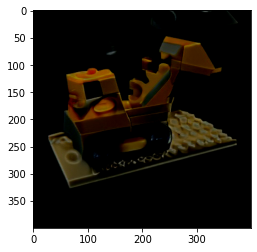

In [14]:
plt.imshow(image.detach().squeeze(0).cpu().permute(1,2,0).numpy())